In [71]:
import pandas as pd
import os
from numpy import nansum
from numpy import nanmean
import numpy as np

## Problem 1
---------
Write a software program to calculate for each weather data file the number of days in which the maximum temperature and minimum temperature data are present but the precipitation data is missing. The program should create one line of output for each of the weather data files. Each line of output should have the filename (e.g. USC00339312.txt) and the number of days you have identified. Separate the columns by a tab. Write the output in ascending order by filename and store it in the file MissingPrcpData.out in the answers folder.


In [ ]:
MissingPrcpData_dict = dict()

In [ ]:
for file in os.listdir("../../../Downloads/DataSciTest/wx_data/"):
    if file.endswith(".txt"):
        weather_current = pd.read_csv(os.path.join("../../../Downloads/DataSciTest/wx_data/", file), 
                                     sep = '\t',
                                     header = None,
                                     names = ['date', 'max_temp', 'min_temp', 'precip']
                                     )
        counts = sum(weather_current.apply(lambda row: 1 if (row['max_temp'] != -9999 and 
                                                             row['min_temp'] != -9999 and 
                                                             row['precip'] == -9999) 
                                                           else 0, 
                                           axis=1))
        MissingPrcpData_dict[file] = counts

In [ ]:
MissingPrcpData_df = pd.DataFrame.from_dict(MissingPrcpData_dict, orient = 'index', columns=['counts'])
MissingPrcpData_df.head()
MissingPrcpData_df = MissingPrcpData_df.sort_index()
MissingPrcpData_df = MissingPrcpData_df.reset_index()
MissingPrcpData_df.columns=['filename', 'missing_num_days']
MissingPrcpData_df.head()

In [ ]:
MissingPrcpData_df.to_csv('../../../Downloads/DataSciTest/answers/MissingPrcpData.out', sep='\t', header = True)

## Problem 2
---------
Write a software program to calculate the following values for every year for every station, ignoring missing data:

1. Average maximum temperature (in degrees Celsius)
2. Average minimum temperature (in degrees Celsius)
3. Total accumulated precipitation (in centimeters)

The program should create one line of output for each of the weather stations. Each line of output should have the following information separated by tabs: the filename, the year, the average maximum temperature to 2 decimal places, the average minimum temperature to 2 decimal places, and the total accumulated precipitation to 2 decimal places. If a value cannot be calculated assign a value of -9999.00 when writing your output.  Store your results in the file YearlyAverages.out in the answers folder, sorted in ascending order by filename.


In [108]:
weather_year = np.arange(1985, 2015,1)

In [116]:
YearlyAverages_dict = dict()
weather_agg = dict()

In [117]:
for file in os.listdir("../../../Downloads/DataSciTest/wx_data/"):
    if file.endswith(".txt"):
        weather_current = pd.read_csv(os.path.join("../../../Downloads/DataSciTest/wx_data/", file), 
                                     sep = '\t',
                                     header = None,
                                     names = ['date', 'max_temp', 'min_temp', 'precip']
                                     )
        weather_current['year'] = [int(x.astype('str')[:4]) for x in weather_current.date.values]
        
        # replace -9999 into np.nan
        weather_current = weather_current.replace(-9999, np.nan)
        
        # yearly aggregation
        weather_current_agg = weather_current.groupby('year').agg({'max_temp':nanmean,
                                                                   'min_temp':nanmean,
                                                                   'precip':nansum}).reset_index()
        
        weather_agg[file] = weather_current_agg
        # make sure all the stations have 30 years
        if weather_current_agg.shape[0] < 30:
            missing_year = [x for x in weather_year if x not in weather_current_agg.year.values]
            missing_year_df = pd.DataFrame(missing_year)
            missing_year_df.columns = ['year']
            missing_year_df['max_temp'] = np.nan
            missing_year_df['min_temp'] = np.nan
            missing_year_df['precip'] = np.nan

            weather_current_agg = pd.concat([weather_current_agg,
                                             missing_year_df], axis = 0)
            weather_current_agg = weather_current_agg.sort_values('year')
        
        # if missing then agg, then replace as -9999
        weather_current_agg = weather_current_agg.fillna(-9999)
        
        # convert the year into one row
        # make sure the temp and precipitation is 2 decimal, if -9999, then keep no decimal
        df = pd.DataFrame()
        for index, row in weather_current_agg.iterrows():
            df_row = pd.DataFrame(row).transpose().reset_index(drop=True)
            df_row['year'] = df_row['year'].map('{:.0f}'.format)
            df_row['max_temp'] = df_row['max_temp'].apply(lambda x: '{:.2f}'.format(x) if x !=-9999 else '{:.0f}'.format(x))
            df_row['min_temp'] = df_row['min_temp'].apply(lambda x: '{:.2f}'.format(x) if x !=-9999 else '{:.0f}'.format(x))
            df_row['precip'] = df_row['precip'].apply(lambda x: '{:.2f}'.format(x) if x !=-9999 else '{:.0f}'.format(x))
            df = pd.concat([df, df_row], axis=1)
        # add output to dict    
        YearlyAverages_dict[file] = df.iloc[:1, :].values[0]

In [111]:
# convert the dict into df
YearlyAverages_df = pd.DataFrame.from_dict(YearlyAverages_dict, orient='index')
YearlyAverages_df = YearlyAverages_df.sort_index()
YearlyAverages_df.columns = df.columns
YearlyAverages_df = YearlyAverages_df.reset_index()
YearlyAverages_df=YearlyAverages_df.rename(columns = {'index':'filename'})
YearlyAverages_df.head()

,filename,year,max_temp,min_temp,precip,year,max_temp,min_temp,precip,year,...,min_temp,precip,year,max_temp,min_temp,precip,year,max_temp,min_temp,precip
0,USC00110072.txt,1985,153.35,43.26,7801.00,1986,126.96,21.76,5053.00,1987,...,54.04,7450.00,2013,152.63,35.06,8114.00,2014,138.05,23.71,9863.00
1,USC00110187.txt,1985,192.65,78.11,14655.00,1986,203.74,88.15,12013.00,1987,...,93.95,7825.00,2013,204.62,92.88,7707.00,2014,-9999,-9999,-9999
2,USC00110338.txt,1985,144.25,29.71,9516.00,1986,154.08,33.69,4156.00,1987,...,64.32,6592.00,2013,142.51,40.05,10929.00,2014,132.56,29.75,10394.00
3,USC00111280.txt,1985,169.80,65.13,11402.00,1986,183.20,77.63,7975.00,1987,...,72.82,8236.00,2013,165.09,53.83,9919.00,2014,135.36,16.84,4417.00
4,USC00111436.txt,1985,167.36,64.41,12463.00,1986,180.29,75.49,9108.00,1987,...,84.76,8515.00,2013,183.05,67.74,10575.00,2014,176.89,60.43,12942.00


In [ ]:
YearlyAverages_df.to_csv('../../../Downloads/DataSciTest/answers/YearlyAverages.out', sep='\t', header = True)

## Problem 3
---------
Write a software program that tabulates how often each year from 1985-2014 had the highest average maximum temperature, highest average minimum temperature, and highest total accumulated precipitation from the set of weather stations. Use the results of Problem 2 as input to your program. The resulting output should indicate how frequently a given year had the highest values for the 167 weather stations present in wx_data.

Output should be written to the file YearHistogram.out in the answers folder. The file should contain 4 columns: the year, the count of how many weather stations had that year as the highest annual average maximum temperature, a count of how many weather stations had that year as the highest annual average minimum temperature, and a count of how many weather stations had that year as the highest total annual precipitation. Separate each column by tabs and sort the output in ascending order by year. In addition, create a histogram of the output and save the result as YearHistogram.png.


In [6]:
# read in weather data from problem 2
weather_yearly = pd.read_csv('../../../Downloads/DataSciTest/answers/YearlyAverages.out', sep='\t')

In [114]:
weather_yearly.head()

,Unnamed: 0,filename,year,max_temp,min_temp,precip,year.1,max_temp.1,min_temp.1,precip.1,...,min_temp.27,precip.27,year.28,max_temp.28,min_temp.28,precip.28,year.29,max_temp.29,min_temp.29,precip.29
0,0,USC00110072.txt,1985,153.35,43.26,7801.0,1986,126.96,21.76,5053.0,...,54.04,7450.0,2013,152.63,35.06,8114.0,2014,138.05,23.71,9863.0
1,1,USC00110187.txt,1985,192.65,78.11,14655.0,1986,203.74,88.15,12013.0,...,93.95,7825.0,2013,204.62,92.88,7707.0,2014,-9999.00,-9999.00,-9999.0
2,2,USC00110338.txt,1985,144.25,29.71,9516.0,1986,154.08,33.69,4156.0,...,64.32,6592.0,2013,142.51,40.05,10929.0,2014,132.56,29.75,10394.0
3,3,USC00111280.txt,1985,169.80,65.13,11402.0,1986,183.20,77.63,7975.0,...,72.82,8236.0,2013,165.09,53.83,9919.0,2014,135.36,16.84,4417.0
4,4,USC00111436.txt,1985,167.36,64.41,12463.0,1986,180.29,75.49,9108.0,...,84.76,8515.0,2013,183.05,67.74,10575.0,2014,176.89,60.43,12942.0


In [62]:
# parse the data into format - wide to long 
weather_df = pd.DataFrame()
for index, row in weather_yearly.iterrows():
    df = pd.DataFrame()
    for i in list(range(117))[0::4]:
        df_row = pd.DataFrame(row[i+2:i+6]).transpose()
        df_row.columns = ['year', 'max_temp', 'min_temp', 'precip']
        df_row['filename'] = row['filename']
        df = pd.concat([df, df_row], axis = 0)
    weather_df = pd.concat([weather_df, df], axis=0)    

In [63]:
weather_df = weather_df.reset_index(drop=True)
weather_df.head()

,year,max_temp,min_temp,precip,filename
0,1985,153.35,43.26,7801.0,USC00110072.txt
1,1986,126.96,21.76,5053.0,USC00110072.txt
2,1987,177.6,63.3,7936.0,USC00110072.txt
3,1988,173.47,45.35,5410.0,USC00110072.txt
4,1989,156.52,39.84,7937.0,USC00110072.txt


In [84]:
# collect counts
YearHistogram = pd.DataFrame()
YearHistogram['year'] = np.arange(1985, 2015,1)
YearHistogram.head()

,year
0,1985
1,1986
2,1987
3,1988
4,1989


In [75]:
# function to count max occurance 
def count_max(feature_name):
    # make sure feature type is float
    weather_df[feature_name] = weather_df[feature_name].astype(float)
    # count max
    max_counts = weather_df.loc[weather_df.groupby('filename')[feature_name].idxmax()].groupby('year')[feature_name].count()
    max_counts = pd.DataFrame(max_counts).reset_index()
    return(max_counts)

In [78]:
# find year for max_temp
max_temp_counts = count_max('max_temp')
max_temp_counts.head()

,year,max_temp
0,1985,2
1,1986,1
2,1987,13
3,1988,6
4,1990,2


In [85]:
# merge into counts collection df
YearHistogram = YearHistogram.merge(max_temp_counts, on ='year', how = 'left')
print(YearHistogram.shape)
YearHistogram.head()

(30, 2)


,year,max_temp
0,1985,2.0
1,1986,1.0
2,1987,13.0
3,1988,6.0
4,1989,NaN


In [80]:
# find year for min temp
min_temp_counts = count_max('min_temp')
min_temp_counts.head()

,year,min_temp
0,1985,4
1,1986,2
2,1987,17
3,1988,5
4,1990,2


In [86]:
# merge into counts collection df
YearHistogram = YearHistogram.merge(min_temp_counts, on ='year', how = 'left')
print(YearHistogram.shape)
YearHistogram.head()

(30, 3)


,year,max_temp,min_temp
0,1985,2.0,4.0
1,1986,1.0,2.0
2,1987,13.0,17.0
3,1988,6.0,5.0
4,1989,NaN,NaN


In [82]:
# find year for precipitation
precip_counts = count_max('precip')
precip_counts.head()

,year,precip
0,1986,5
1,1987,1
2,1990,23
3,1992,2
4,1993,38


In [87]:
# merge into counts collection df
YearHistogram = YearHistogram.merge(precip_counts, on ='year', how = 'left')
print(YearHistogram.shape)
YearHistogram.head()

(30, 4)


,year,max_temp,min_temp,precip
0,1985,2.0,4.0,NaN
1,1986,1.0,2.0,5.0
2,1987,13.0,17.0,1.0
3,1988,6.0,5.0,NaN
4,1989,NaN,NaN,NaN


In [88]:
# save the output 
YearHistogram.columns = ['year', 'max_temp_counts', 'min_temp_counts', 'precip_counts']
YearHistogram.to_csv('../../../Downloads/DataSciTest/answers/YearHistogram.out', sep='\t', header = True)

/var/folders/xp/004wmms15c7d68my3c768p1h0000gp/T/ipykernel_76367/1167033882.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  YearHistogram[['max_temp_counts', 'min_temp_counts', 'precip_counts']].hist(ax=ax, layout=(1,3))


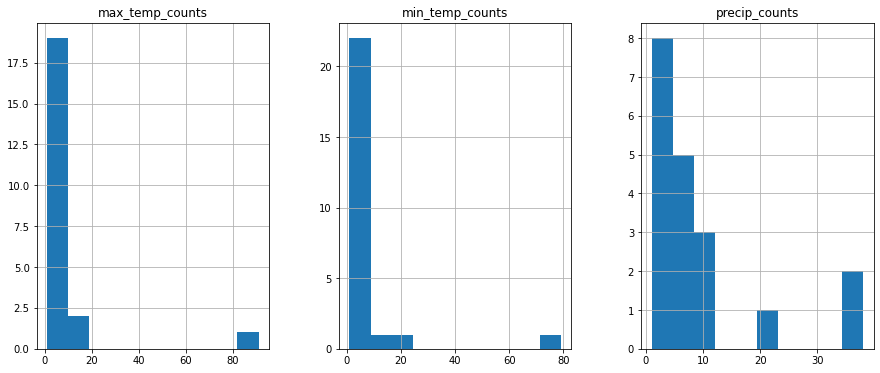

In [102]:
# plot histogram
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
ax = fig.gca()
YearHistogram[['max_temp_counts', 'min_temp_counts', 'precip_counts']].hist(ax=ax, layout=(1,3))
plt.show()

In [106]:
# output histogram
fig.savefig('../../../Downloads/DataSciTest/answers/YearHistogram.png')

## Problem 4
---------
Use the annual average maximum temperature, annual average minimum temperature, and total annual precipitation results from Problem 2 and calculate the Pearson correlation between these variables and the grain yield data stored in US_corn_grain_yield.txt. Output the correlations for every station. Write your output to the file Correlations.out in the answers folder. The columns of the file should be separated by tabs and will contain the filename of the weather station (e.g. USC00339312.txt) and the three correlation values to 2 decimal places. Sort the output in ascending order by filename.


In [112]:
# read yield data
yld = pd.read_csv('../../../Downloads/DataSciTest/yld_data/US_corn_grain_yield.txt', sep='\t', header=None, names = ['year', 'yield'])

In [121]:
print(yld.shape)
yld.head()


(30, 2)


,year,yield
0,1985,225447
1,1986,208944
2,1987,181143
3,1988,125194
4,1989,191320


In [133]:
# collect correlation
correlations_dict = dict()

for key in weather_agg.keys():
    df = weather_agg[key]
    df['yield'] = yld['yield']
    corr = df[['yield','max_temp', 'min_temp', 'precip']].corr(method='pearson')
    correlations_dict[key] = corr.iloc[0, 1:].values

In [142]:
# convert the dict into df
correlations_df = pd.DataFrame.from_dict(correlations_dict, orient='index')
correlations_df = correlations_df.sort_index()
correlations_df = correlations_df.reset_index()
correlations_df.columns = ['filename', 'yield_max_temp', 'yield_min_temp', 'yield_precip']
correlations_df = round(correlations_df,2)
correlations_df.head()

,filename,yield_max_temp,yield_min_temp,yield_precip
0,USC00110072.txt,-0.27,-0.29,0.21
1,USC00110187.txt,0.28,0.11,0.02
2,USC00110338.txt,-0.30,0.22,0.25
3,USC00111280.txt,-0.21,-0.31,-0.11
4,USC00111436.txt,0.10,0.01,0.09


In [143]:
# output 
correlations_df.to_csv('../../../Downloads/DataSciTest/answers/Correlations.out', sep = '\t', header = True)